In [1]:
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0,-4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

$ t_c \rightarrow \text{Temperature in Celsius}$ 

$ t_u \rightarrow \text{Temperature in Unknown scale}$ 

In [3]:
from matplotlib import pyplot as plt

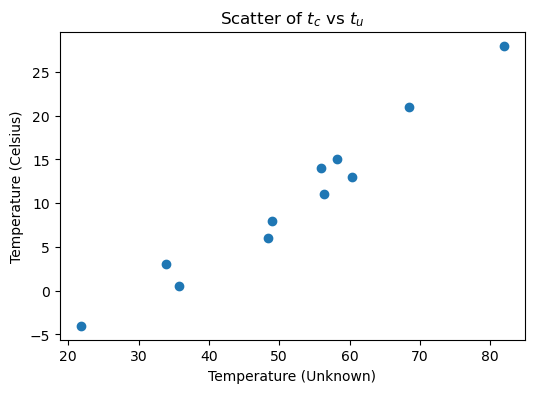

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(t_u, t_c)
plt.xlabel('Temperature (Unknown)')
plt.ylabel('Temperature (Celsius)')
plt.title('Scatter of $t_c$ vs $t_u$')
plt.show()

Assuming a Linear Model would explain the data
$$ f_{w, b}(t_u) = w * t_u + b = t_p$$
$ t_p \rightarrow \text{Temperature Predicted}$


In [5]:
def model(t_u, w, b):
    t_p = w * t_u + b
    return t_p

Using Mean Squared Loss Function for calculating the error
$$ \mathcal{L}(t_p, t_c) = \frac{1}{n} \sum_{i=1}^n (t_p - t_c)^2 $$
$n \rightarrow \text{Number of Examples}$

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    mean_sq = squared_diffs.mean()
    return mean_sq

In [7]:
w = torch.ones(())
b = torch.zeros(())

print('Weights:', w)
print('Bias:', b)

Weights: tensor(1.)
Bias: tensor(0.)


In [8]:
t_p = model(t_u, w, b)

print('Predictions:', t_p)

Predictions: tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [9]:
loss = loss_fn(t_p, t_c)

print('Loss Value:', loss)

Loss Value: tensor(1763.8848)


Derivative of Loss Function wrt the model parameters to find the Gradient
$$ \frac{d \mathcal{L}}{d \alpha_i} = \frac{d \mathcal{L}}{d t_p} \frac{d t_p}{d \alpha_i} $$
$ \mathcal{L} \rightarrow \text{Loss Function} $

$ \alpha_i \rightarrow \text{Model Parameters} $

$$ \frac{d \mathcal{L}}{d t_p} = \frac{1}{n} * 2 * (t_p - t_c) $$

In [10]:
def dloss_fn(t_p, t_c):
    derivative = 2 * (t_p - t_c) / t_p.shape[0]
    return derivative

$$ \frac{d t_p}{d w} = t_u $$
$$ \frac{d t_p}{d b} = 1 $$

In [11]:
def dmodel_dw(t_u, w, b):
    derivative = t_u
    return derivative

In [12]:
def dmodel_db(t_u, w, b):
    derivative = 1
    return derivative

Gradient Vector
$$ \vec{\mathcal{G}} = \nabla_{w,b}\mathcal{L} = \begin{pmatrix}
\frac{d \mathcal{L}}{d w} \\
\\
\frac{d \mathcal{L}}{d b}
\end{pmatrix} = \begin{pmatrix}
\frac{d \mathcal{L}}{d t_p} \frac{d t_p}{d w} \\
\\
\frac{d \mathcal{L}}{d t_p} \frac{d t_p}{d b}
\end{pmatrix} $$

In [13]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)

    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

    grad_vec = torch.stack([dloss_dw.sum(), dloss_db.sum()])

    return grad_vec

In [14]:
print('Gradient Vector:', grad_fn(t_u, t_c, t_p, w, b))

Gradient Vector: tensor([4517.2964,   82.6000])


Update Rule
$$ \alpha \rightarrow \alpha - ( lr * \vec{\mathcal{G}} ) $$

In [15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        if epoch <= 10 or epoch >= n_epochs-9:
            print(f'Epoch: {epoch:3d}, Loss: {loss:.3f}')

    return params

In [16]:
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params = torch.tensor([1, 0]),
    t_u = t_u,
    t_c = t_c,
)

Epoch:   1, Loss: 1763.885
Epoch:   2, Loss: 5802484.500
Epoch:   3, Loss: 19408029696.000
Epoch:   4, Loss: 64915905708032.000
Epoch:   5, Loss: 217130525461053440.000
Epoch:   6, Loss: 726257583152928129024.000
Epoch:   7, Loss: 2429183416467662896627712.000
Epoch:   8, Loss: 8125122549611731432050262016.000
Epoch:   9, Loss: 27176882120842590626938030653440.000
Epoch:  10, Loss: 90901105189019073810297959556841472.000
Epoch:  91, Loss: nan
Epoch:  92, Loss: nan
Epoch:  93, Loss: nan
Epoch:  94, Loss: nan
Epoch:  95, Loss: nan
Epoch:  96, Loss: nan
Epoch:  97, Loss: nan
Epoch:  98, Loss: nan
Epoch:  99, Loss: nan
Epoch: 100, Loss: nan


tensor([nan, nan])

Where did it go wrong ?

In [17]:
training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params = torch.tensor([1, 0]),
    t_u = t_u,
    t_c = t_c,
)

Epoch:   1, Loss: 1763.885
Epoch:   2, Loss: 323.091
Epoch:   3, Loss: 78.930
Epoch:   4, Loss: 37.553
Epoch:   5, Loss: 30.540
Epoch:   6, Loss: 29.351
Epoch:   7, Loss: 29.149
Epoch:   8, Loss: 29.114
Epoch:   9, Loss: 29.107
Epoch:  10, Loss: 29.105
Epoch:  91, Loss: 29.031
Epoch:  92, Loss: 29.030
Epoch:  93, Loss: 29.029
Epoch:  94, Loss: 29.028
Epoch:  95, Loss: 29.027
Epoch:  96, Loss: 29.026
Epoch:  97, Loss: 29.025
Epoch:  98, Loss: 29.024
Epoch:  99, Loss: 29.024
Epoch: 100, Loss: 29.023


tensor([ 0.2327, -0.0438])

Why is Loss decreasing so slowly ?

In [18]:
print('Minimum value in t_u:', t_u.min())
print('Maximum value in t_u:', t_u.max())

scaling_factor = 1 / (t_u.max() - t_u.min())
print('Scaling Factor:', scaling_factor)

Minimum value in t_u: tensor(21.8000)
Maximum value in t_u: tensor(81.9000)
Scaling Factor: tensor(0.0166)


In [19]:
t_u_n = scaling_factor * t_u
# t_u_n = 0.1 * t_u

print('Minimum value in t_u_n:', t_u_n.min())
print('Maximum value in t_u_n:', t_u_n.max())

Minimum value in t_u_n: tensor(0.3627)
Maximum value in t_u_n: tensor(1.3627)


In [20]:
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params = torch.tensor([1, 0]),
    t_u = t_u_n,
    t_c = t_c,
)

Epoch:   1, Loss: 165.500
Epoch:   2, Loss: 157.487
Epoch:   3, Loss: 150.028
Epoch:   4, Loss: 143.083
Epoch:   5, Loss: 136.616
Epoch:   6, Loss: 130.596
Epoch:   7, Loss: 124.989
Epoch:   8, Loss: 119.768
Epoch:   9, Loss: 114.906
Epoch:  10, Loss: 110.377
Epoch:  91, Loss: 45.266
Epoch:  92, Loss: 45.187
Epoch:  93, Loss: 45.108
Epoch:  94, Loss: 45.030
Epoch:  95, Loss: 44.953
Epoch:  96, Loss: 44.877
Epoch:  97, Loss: 44.801
Epoch:  98, Loss: 44.726
Epoch:  99, Loss: 44.652
Epoch: 100, Loss: 44.579


tensor([8.2098, 4.0016])

In [21]:
params = training_loop(
    n_epochs = 10000,
    learning_rate = 1e-2,
    params = torch.tensor([1, 0]),
    t_u = t_u_n,
    t_c = t_c,
)
params

Epoch:   1, Loss: 165.500
Epoch:   2, Loss: 157.487
Epoch:   3, Loss: 150.028
Epoch:   4, Loss: 143.083
Epoch:   5, Loss: 136.616
Epoch:   6, Loss: 130.596
Epoch:   7, Loss: 124.989
Epoch:   8, Loss: 119.768
Epoch:   9, Loss: 114.906
Epoch:  10, Loss: 110.377
Epoch: 9991, Loss: 2.928
Epoch: 9992, Loss: 2.928
Epoch: 9993, Loss: 2.928
Epoch: 9994, Loss: 2.928
Epoch: 9995, Loss: 2.928
Epoch: 9996, Loss: 2.928
Epoch: 9997, Loss: 2.928
Epoch: 9998, Loss: 2.928
Epoch: 9999, Loss: 2.928
Epoch: 10000, Loss: 2.928


tensor([ 32.2513, -17.2970])

$$ Model \rightarrow 0.5366 * t_c - 17.2970 $$
$$ Actual \rightarrow 0.5556 * t_c - 17.7778 $$

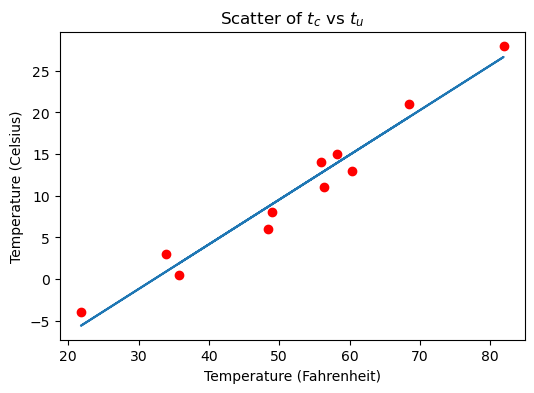

In [22]:
t_p = model(t_u_n, *params)

plt.figure(figsize=(6, 4))
plt.scatter(t_u, t_c, c='r')
plt.plot(t_u, t_p)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')
plt.title('Scatter of $t_c$ vs $t_u$')
plt.show()

Magic of autograd

In [23]:
params = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)

print('Gradients:', params.grad)

Gradients: None


In [24]:
t_p = model(t_u_n, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

In [25]:
print('Gradients:', params.grad)

Gradients: tensor([-21.0722, -19.2762])


PyTorch Optimizers

In [26]:
from torch import optim

In [27]:
params = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

In [28]:
t_p = model(t_u_n, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

In [29]:
print('Parameters:', params)

Parameters: tensor([1., 0.], requires_grad=True)


In [30]:
optimizer.step()

In [31]:
print('Parameters:', params)

Parameters: tensor([1.2107, 0.1928], requires_grad=True)


Final Training Loop

In [32]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()    # To zero out the gradients from previous epoch

        loss.backward()    # Earlier --> grad = grad_fn(t_u, t_c, t_p, w, b)

        optimizer.step()     # Earlier --> params = params - learning_rate * grad

        if epoch <= 10 or epoch >= n_epochs-9:
            print(f'Epoch: {epoch:3d}, Loss: {loss:.3f}')

    return params

In [33]:
params = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    params = params,
    t_u = t_u_n,
    t_c = t_c
    )

Epoch:   1, Loss: 165.500
Epoch:   2, Loss: 157.487
Epoch:   3, Loss: 150.028
Epoch:   4, Loss: 143.083
Epoch:   5, Loss: 136.616
Epoch:   6, Loss: 130.596
Epoch:   7, Loss: 124.989
Epoch:   8, Loss: 119.768
Epoch:   9, Loss: 114.906
Epoch:  10, Loss: 110.377
Epoch: 9991, Loss: 2.928
Epoch: 9992, Loss: 2.928
Epoch: 9993, Loss: 2.928
Epoch: 9994, Loss: 2.928
Epoch: 9995, Loss: 2.928
Epoch: 9996, Loss: 2.928
Epoch: 9997, Loss: 2.928
Epoch: 9998, Loss: 2.928
Epoch: 9999, Loss: 2.928
Epoch: 10000, Loss: 2.928


tensor([ 32.2513, -17.2970], requires_grad=True)

In [1]:
60965224 / 1e6

60.965224

Validating the model's predictions

In [34]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  2, 10,  3,  7,  1,  6,  5,  8]), tensor([4, 0]))

In [35]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_u_n = 0.1 * train_t_u
val_t_u_n = 0.1 * val_t_u

In [36]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

    return loss

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_loss = calc_forward(train_t_u, train_t_c, is_train=True)
        
        val_loss = calc_forward(val_t_u, val_t_c, is_train=False)

        optimizer.zero_grad()    

        train_loss.backward()    

        optimizer.step()     

        if epoch <= 10 or epoch >= n_epochs-9:
            print(f'Epoch: {epoch:3d}, Train Loss: {train_loss:.3f}, Val Loss: {val_loss:.3f}')

    return params

In [37]:
params = torch.tensor([1, 0], dtype=torch.float, requires_grad=True)
lr = 1e-2
optimizer = optim.SGD([params], lr=lr)

training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_u_n,
    val_t_u = val_t_u_n,
    train_t_c = train_t_c,
    val_t_c = val_t_c
    )

Epoch:   1, Train Loss: 93.972, Val Loss: 19.131
Epoch:   2, Train Loss: 37.021, Val Loss: 20.674
Epoch:   3, Train Loss: 29.493, Val Loss: 30.674
Epoch:   4, Train Loss: 28.430, Val Loss: 35.467
Epoch:   5, Train Loss: 28.213, Val Loss: 37.299
Epoch:   6, Train Loss: 28.107, Val Loss: 37.920
Epoch:   7, Train Loss: 28.015, Val Loss: 38.085
Epoch:   8, Train Loss: 27.926, Val Loss: 38.084
Epoch:   9, Train Loss: 27.837, Val Loss: 38.021
Epoch:  10, Train Loss: 27.749, Val Loss: 37.938
Epoch: 9991, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9992, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9993, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9994, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9995, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9996, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9997, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9998, Train Loss: 2.820, Val Loss: 4.243
Epoch: 9999, Train Loss: 2.820, Val Loss: 4.243
Epoch: 10000, Train Loss: 2.820, Val Loss: 4.243


tensor([  5.2988, -16.5753], requires_grad=True)